In [1]:
#loading libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
# Step 1: Load and Preprocess Data
# Assuming you have a DataFrame named 'product_df' with columns 'price', 'ratings', and 'reviews'
product_df= pd.read_csv("https://raw.githubusercontent.com/Vakiti/SkinTelligence-Navigating-The-Amazon-Skincare-Universe/datasets/final_dataset.csv")
product_df

,ASIN,product_name,price,listPrice,detailPageURL,rating,totalReviews,product_company,isPrimeEligible,Category,ingredients,highlights
0,B0C2NBW5LM,yopela 14 pack natural lip balm in bulk with ...,5.59,NaN,https://www.amazon.com/dp/B0C2NBW5LM,4.3,311.0,yopela,1.0,lipbalm,Not found,Not found
1,B0B43WPH44,#ootd vegan hydrating korean face mask sheet p...,33.90,NaN,https://www.amazon.com/dp/B0B43WPH44,4.5,381.0,#ootd,1.0,sheet mask,Not found,Not found
2,B083QCJPDD,beauty of joseon centella asiatica calming mas...,15.52,25.00,https://www.amazon.com/dp/B083QCJPDD,4.5,135.0,beauty of joseon,1.0,sheet mask,Not found,Not found
3,B0B3R661JP,beauty of joseon radiance cleansing balm (100m...,17.10,19.00,https://www.amazon.com/dp/B0B3R661JP,4.6,302.0,beauty of joseon,1.0,cleansing oil,Not found,Not found
4,B00OZ6W8DW,cosrx salicylic acid daily gentle cleanser 150...,13.99,NaN,https://www.amazon.com/dp/B00OZ6W8DW,4.6,1581.0,cosrx,1.0,cleanser,Not found,Not found
...,...,...,...,...,...,...,...,...,...,...,...,...
1233,B0BQ3R8LH7,zeoclay face mask - 100% organic spa quality -...,38.24,44.99,https://www.amazon.com/dp/B0BQ3R8LH7,5.0,20.0,zeoclay,1.0,clay mask,Not found,Not found
1234,B07S472V7D,zo skin health gentle cleanser 6.7 fl. oz.,36.90,40.97,https://www.amazon.com/dp/B07S472V7D,4.7,606.0,zo skin health,1.0,cleanser,Not found,Not found
1235,B0150GNTQK,zum face sugar facial scrub - lemongrass - 4 oz,15.25,NaN,https://www.amazon.com/dp/B0150GNTQK,4.5,166.0,zum,1.0,face scrub,Not found,Not found
1236,B07P8ZN5JS,𝗧𝗢𝗣 𝟮𝟬𝟮𝟯* hyaluronic acid face serum - 2.5% pu...,9.99,11.99,https://www.amazon.com/dp/B07P8ZN5JS,4.3,24024.0,eclat skincare,1.0,serum,Not found,Not found


In [48]:
# Drop rows with missing values
cleaned_product_df = product_df.dropna()

# Step 2: Feature Selection
# Select the relevant columns as your features
selected_features = cleaned_product_df[['price', 'rating', 'totalReviews']]
selected_features

,price,rating,totalReviews
2,15.52,4.5,135.0
3,17.10,4.6,302.0
5,8.99,4.4,506.0
7,13.00,4.5,317.0
14,28.99,4.5,1187.0
...,...,...,...
1231,9.99,4.4,7586.0
1232,24.99,4.3,426.0
1233,38.24,5.0,20.0
1234,36.90,4.7,606.0


In [64]:
import pandas as pd

# Assuming you have a DataFrame named 'your_dataframe'
# Replace 'your_dataframe' with the name of your DataFrame

# Specify the file path where you want to save the CSV file
file_path = r"C:\Users\vakit\OneDrive\Desktop\clustering_df.csv"  # Replace with your desired file path

# Use the to_csv method to save the DataFrame as a CSV file
selected_features.to_csv(file_path, index=False)  # Set index to False if you don't want to save the DataFrame index

print(f'DataFrame saved as CSV file: {file_path}')

DataFrame saved as CSV file: C:\Users\vakit\OneDrive\Desktop\clustering_df.csv


In [14]:
# Step 3: Feature Scaling
# Standardize the selected features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

C:\Users\vakit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


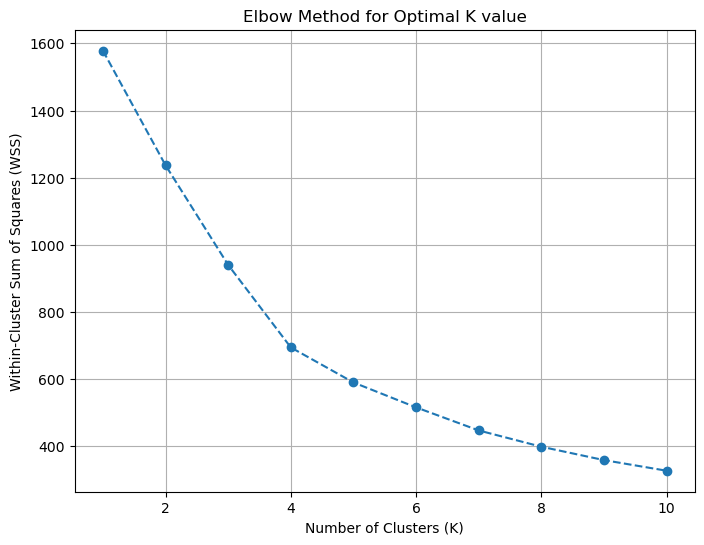

In [16]:
# Step 4: Choose the Number of Clusters (K)
# Use the elbow method to determine the optimal K value
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    wss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal K value')
plt.grid()
plt.show()

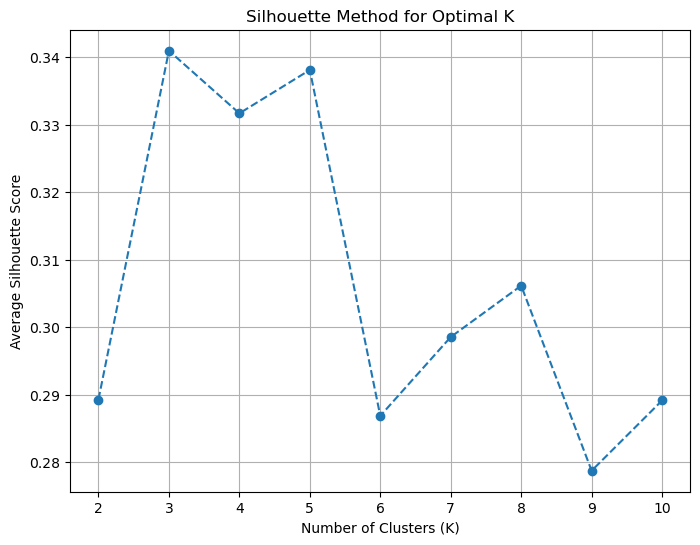

In [18]:
from sklearn.metrics import silhouette_score
# Silhouette Method
silhouette_scores = []
for k in range(2, 11):  # Trying different values of K
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.grid()
plt.show()

In [21]:
!pip install gap-stat

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: still running...
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6137 sha256=7625b9afb70c2e7d6e6193e55467abd7aa99b5e2a05d05853e2e6d768ac16fc2
  Stored in directory: c:\users\vakit\appdata\local\pip\cache\wheels\0b\17\a7\32188dacfe9b77972af23712793850e6ce97b1db31f397cd2e
Successfully built gap-stat
Optimal number of clusters according to Gap Statistic: 1


In [23]:
from gap_statistic import OptimalK
# Gap Statistic Method
optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(scaled_features, cluster_array=np.arange(1, 11))
print("Optimal number of clusters according to Gap Statistic:", n_clusters)

Optimal number of clusters according to Gap Statistic: 1


C:\Users\vakit\AppData\Local\Temp\ipykernel_30300\4128835705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['hybrid_feature1'] = selected_features['price'] + selected_features['rating'] + selected_features['totalReviews']
C:\Users\vakit\AppData\Local\Temp\ipykernel_30300\4128835705.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['hybrid_feature2'] = selected_features['price'] * selected_features['rating'] - selected_features['totalReviews']


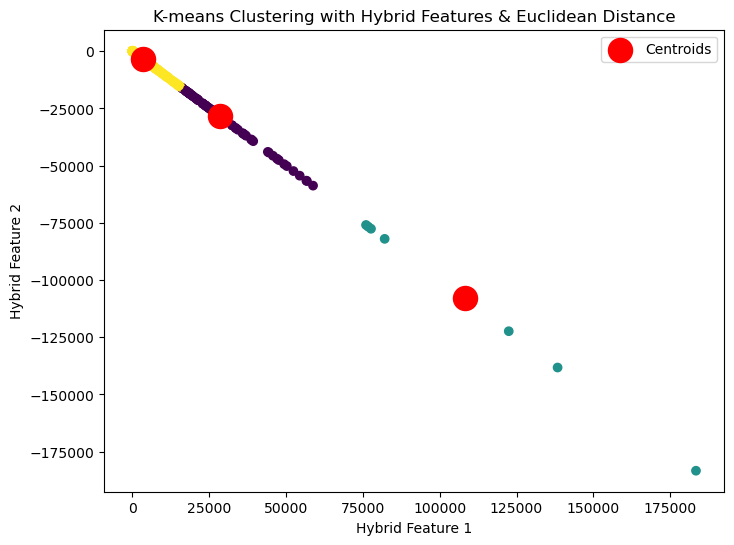

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have a Pandas DataFrame named 'selected_features' with columns 'feature1', 'feature2', and 'feature3'

# Create hybrid features by combining the three numerical features
selected_features['hybrid_feature1'] = selected_features['price'] + selected_features['rating'] + selected_features['totalReviews']
selected_features['hybrid_feature2'] = selected_features['price'] * selected_features['rating'] - selected_features['totalReviews']

# Select the hybrid features for clustering
selected_features1 = selected_features[['hybrid_feature1', 'hybrid_feature2']].values

# Number of clusters
n_clusters = 3

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features1)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()

C:\Users\vakit\AppData\Local\Temp\ipykernel_30300\565095317.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['hybrid_feature1'] = selected_features['totalReviews'] + selected_features['price'] + selected_features['rating']
C:\Users\vakit\AppData\Local\Temp\ipykernel_30300\565095317.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features['hybrid_feature2'] = selected_features['totalReviews'] * selected_features['price'] - selected_features['rating']


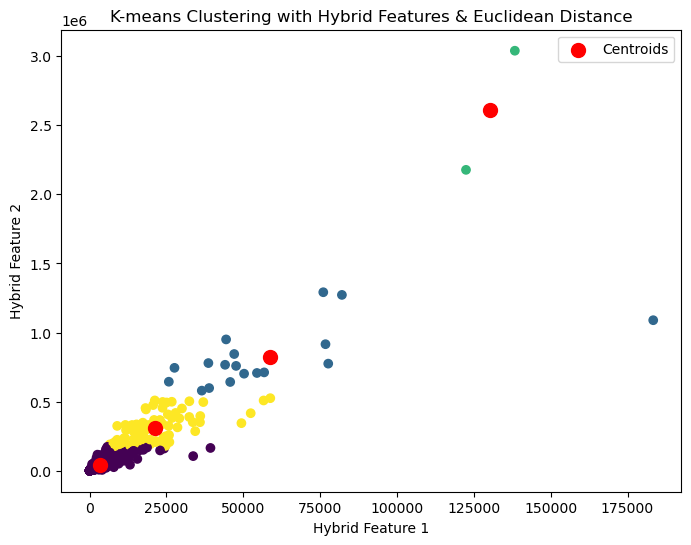

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create hybrid features by combining the three numerical features
selected_features['hybrid_feature1'] = selected_features['totalReviews'] + selected_features['price'] + selected_features['rating']
selected_features['hybrid_feature2'] = selected_features['totalReviews'] * selected_features['price'] - selected_features['rating']

# Select the hybrid features for clustering
selected_features1 = selected_features[['hybrid_feature1', 'hybrid_feature2']].values

# Number of clusters
n_clusters = 4

# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(selected_features1)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=100, c='red', label='Centroids')
plt.title('K-means Clustering with Hybrid Features & Euclidean Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()

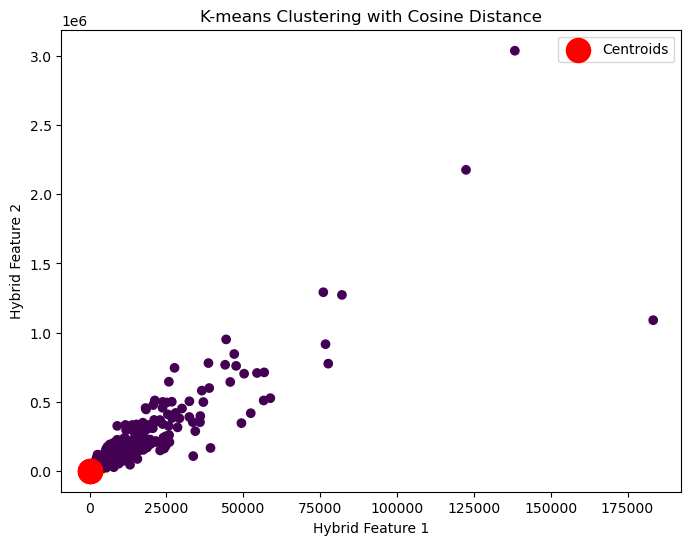

In [52]:
# Calculate cosine distances between data points
cosine_distances = pairwise_distances(selected_features1, metric='cosine')

# Number of clusters
n_clusters = 3

# K-means clustering with cosine distance
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(cosine_distances)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Cosine Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()

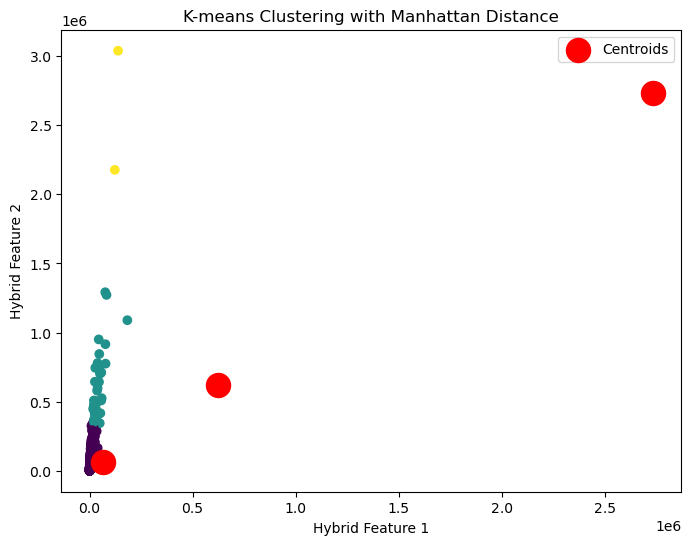

In [53]:
# Calculate Manhattan distances between data points
manhattan_distances = pairwise_distances(selected_features1, metric='manhattan')

# Number of clusters
n_clusters = 3

# K-means clustering with Manhattan distance
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(manhattan_distances)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Manhattan Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()


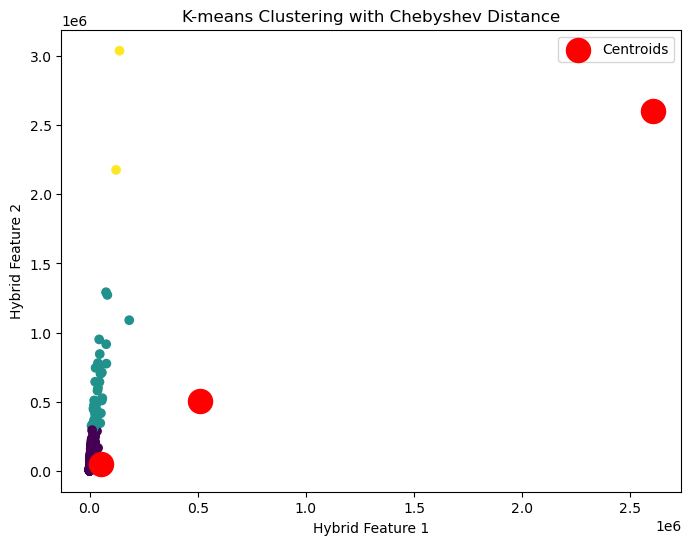

In [54]:
# Calculate Chebyshev distances between data points
chebyshev_distances = pairwise_distances(selected_features1, metric='chebyshev')

# Number of clusters
n_clusters = 3

# K-means clustering with Chebyshev distance
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(chebyshev_distances)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Chebyshev Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()


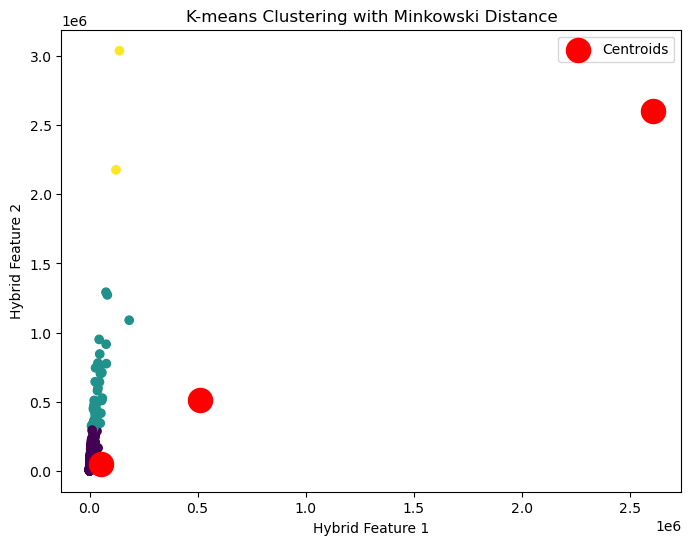

In [56]:
# Calculate Minkowski distances between data points (you can specify the 'p' parameter for the Minkowski distance)
p_value = 2  # For Euclidean distance, set p_value to 2
minkowski_distances = pairwise_distances(selected_features1, metric='minkowski', p=p_value)

# Number of clusters
n_clusters = 3

# K-means clustering with Minkowski distance
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, random_state=0)
kmeans.fit(minkowski_distances)

# Get cluster labels
cluster_labels = kmeans.labels_

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(selected_features1[:, 0], selected_features1[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Minkowski Distance')
plt.xlabel('Hybrid Feature 1')
plt.ylabel('Hybrid Feature 2')
plt.legend()
plt.show()
